In [31]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [32]:
!kaggle datasets download -d rahilmehtaucoe2784/cloth-pattern

100% 2.48G/2.48G [00:54<00:00, 57.7MB/s]
100% 2.48G/2.48G [00:54<00:00, 48.9MB/s]


In [ ]:

!unzip /content/cloth-pattern.zip -d /content/data

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image

In [8]:
training_dir = '/content/NEW LARGE IMAGE '

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   #shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   validation_split = 0.20)

In [10]:
train_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    subset='training',
    

)

validate_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation',
    
)

Found 3771 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


# custom model

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

#model.add(layers.Conv2D(512,(3,3),activation='relu'))
#model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.3))

#model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(5,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 64)      

### pre train model

In [11]:
print(train_genrator.class_indices)
labels = '\n'. join(sorted(train_genrator.class_indices.keys()))
with open('label.txt','w') as f:
  f.write(labels)

{'checkered': 0, 'dots': 1, 'florals ': 2, 'horizontal strip': 3, 'paisley pattern': 4, 'vertical strip': 5, 'zig zag ': 6}


In [18]:
img_shape = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape = img_shape,
    include_top = False,
    weights ='imagenet',
    classes = 7,
)

In [ ]:
base_model.summary()

In [19]:
base_model.trainable=False
model = tf.keras.Sequential([
                             base_model,
                             tf. keras.layers.Conv2D(32,3, activation = 'relu'),
                             tf. keras.layers.Dropout(0.2),
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf. keras.layers.Dense(7, activation='softmax')
])

In [ ]:
learning_rate = 0.001

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              metrics = ['acc'],
               loss=tf.keras.losses.CategoricalCrossentropy())

In [21]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath="/content/new_data_cloth_patern.h5",
                                         monitor="val_acc",
                                         mode="max",
                                         save_best_only=True,)

In [22]:
trained_model = model.fit(
    train_genrator,
    validation_data= validate_genrator,
    epochs = 5,
    #steps_per_epoch=100,
    #validation_steps=33,
    callbacks = [check_point]
    )

Epoch 1/5
118/118 [==============================] - ETA: 0s - loss: 0.5523 - acc: 0.8237

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


118/118 [==============================] - 152s 1s/step - loss: 0.5523 - acc: 0.8237 - val_loss: 0.4105 - val_acc: 0.8571
Epoch 2/5
118/118 [==============================] - 147s 1s/step - loss: 0.2145 - acc: 0.9281 - val_loss: 0.3798 - val_acc: 0.8859
Epoch 3/5
118/118 [==============================] - 148s 1s/step - loss: 0.1655 - acc: 0.9459 - val_loss: 0.4720 - val_acc: 0.8721
Epoch 4/5
118/118 [==============================] - 148s 1s/step - loss: 0.1410 - acc: 0.9565 - val_loss: 0.3991 - val_acc: 0.8913
Epoch 5/5
118/118 [==============================] - 148s 1s/step - loss: 0.1056 - acc: 0.9661 - val_loss: 0.3440 - val_acc: 0.9041


### Visualisation 

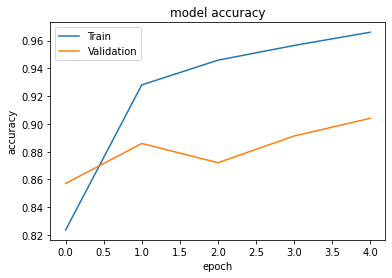

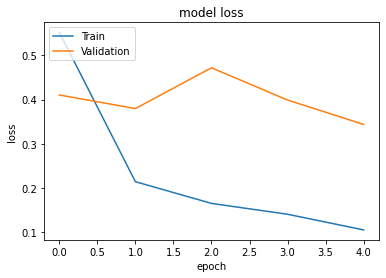

In [23]:
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Evaluation 

In [24]:
model.evaluate(validate_genrator)

30/30 [==============================] - 27s 900ms/step - loss: 0.4129 - acc: 0.8934


[0.412850558757782, 0.8933901786804199]

In [43]:
test_dir = "/content/data/test"
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
test_genrator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',   

)

Found 6706 images belonging to 7 classes.


In [45]:
model.evaluate(test_genrator)

210/210 [==============================] - 56s 268ms/step - loss: 1.7690 - acc: 0.7531


[1.7689799070358276, 0.7530569434165955]

### Testing the model on images

In [28]:
!wget 'https://previews.123rf.com/images/karenr/karenr1407/karenr140700001/29800600-thin-teal-and-white-horizontal-striped-textured-fabric-background-that-is-seamless-and-repeats.jpg'

--2022-02-08 05:00:38--  https://previews.123rf.com/images/karenr/karenr1407/karenr140700001/29800600-thin-teal-and-white-horizontal-striped-textured-fabric-background-that-is-seamless-and-repeats.jpg
Resolving previews.123rf.com (previews.123rf.com)... 13.226.124.58, 13.226.124.72, 13.226.124.67, ...
Connecting to previews.123rf.com (previews.123rf.com)|13.226.124.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245785 (240K) [image/jpeg]
Saving to: ‘29800600-thin-teal-and-white-horizontal-striped-textured-fabric-background-that-is-seamless-and-repeats.jpg’

29800600-thin-teal- 100%[===================>] 240.02K   360KB/s    in 0.7s    

2022-02-08 05:00:40 (360 KB/s) - ‘29800600-thin-teal-and-white-horizontal-striped-textured-fabric-background-that-is-seamless-and-repeats.jpg’ saved [245785/245785]



In [29]:
img = input()

/content/29800600-thin-teal-and-white-horizontal-striped-textured-fabric-background-that-is-seamless-and-repeats.jpg


[[2.8696689e-01 4.5701835e-04 1.3837370e-05 1.3772929e-01 2.9432913e-04
  4.2558428e-02 5.3198022e-01]]


'zig zag'

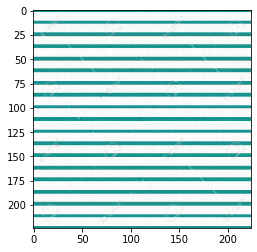

In [30]:
img = image.load_img(img, target_size=(224, 224,3))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
pre = model.predict(img)
print(pre)
class_name = ['checkered','dotted','Flora','horizonal striped','paisley pattern','vertical striped','zig zag']
class_name[np.argmax(pre)]

## Saving the model 

In [46]:
keras_file = 'predict.h5'
keras.models.save_model(model, keras_file)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [57]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp60_do95l/assets


INFO:tensorflow:Assets written to: /tmp/tmp60_do95l/assets


In [58]:

open('model.tflite', 'wb').write(tflite_model)

10345256

## Direct convet .h5 to tftlite

In [ ]:
! tflite_convert \
  --keras_model_file=/content/clotph_patern.h5 \
  --output_file=/content/final_cloth_pattern.tflite

2022-02-04 10:17:27.268262: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-02-04 10:17:27.598413: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 177209344 exceeds 10% of free system memory.
2022-02-04 10:17:27.816697: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 177209344 exceeds 10% of free system memory.
2022-02-04 10:17:28.586886: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-02-04 10:17:29.240815: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 177209344 exceeds 10% of free system memory.
2022-02-04 10:17:29.289844: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 177209344 exceeds 10% of free system memory.
2022-02-04 10:17:29.345068: W tensorflo